# Fourier Transform

This notebook will explain what a fourier transform is and show how it can be implemented in a real world application.

### What are Fourier Transforms?



### What are fourier transforms used for?


### What is this example about?

In [ ]:
# Import required packages
from pathlib import Path

import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy.fft import fft, fftfreq
import numpy as np 

%matplotlib inline

In [ ]:
# useful function

def create_visualisation(x_array, y_array, title, x_title, y_title):
    """Create a visualisation."""
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(
        x=x_array,
        y=y_array,
    )
    # titles and axes contructing
    ax.set_xlabel(x_title)
    ax.set_ylabel(y_title)
    fig.suptitle(t=vtitle, x=0.01, ha="left", fontsize="xx-large")

    plt.show()

    return fig


def calculate_frequency_average(datapoints, frequency, n_arr, dp):
    """Compute fourier transformation"""
    # complex number calculation
    inside_trig_component = (-2 * np.pi * frequency * n_arr / dp )
    real_component = np.mean(datapoints * np.cos(inside_trig_component) )
    imaginary_component = np.mean(datapoints * -np.sin(inside_trig_component) )

    # combining real and imaginary parts
    complex_output = complex(real_component, imaginary_component) 
    return np.abs(complex_output)


In [ ]:
# Get sound information and the required data around
sound_information = {}

# Initial look into the stag sound
stag_sound_filename = Path.cwd() / 'Red_stag_roar-Juan_Carlos_-2004708707.wav'
sound_information["rate"], sound_information["data"] = wav.read(stag_sound_filename)
sound_information["duration"] = 11

# clean data
sound_information["data_1d"] = np.delete(sound_information["data"], 0, 1)
sound_information["nonzerodata"] = sound_information["data_1d"][ sound_information["data_1d"] != 0]

# required variables
sound_information["num_of_nonzero_data_points"] = len(sound_information["nonzerodata"])
sound_information["frequencies"] = np.arange(20000)


/tmp/ipykernel_25601/3741475300.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate, data = wav.read(stag_sound_filename)


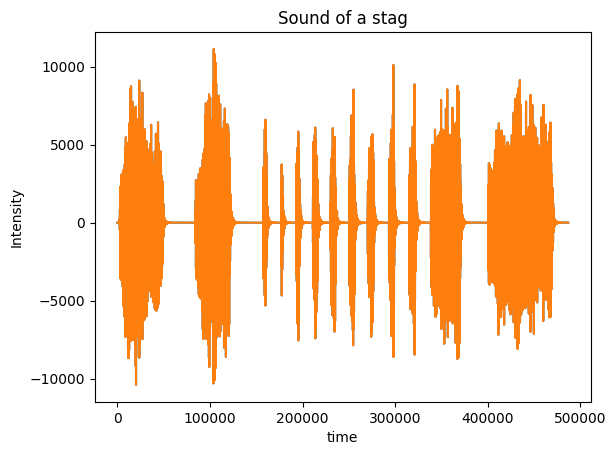

In [3]:
# Initial look into the stag sound
stag_sound_filename = Path.cwd() / 'Red_stag_roar-Juan_Carlos_-2004708707.wav'
rate, data = wav.read(stag_sound_filename)
duration = 11
fft_out = fft(data)

# plots the initial wave prior transforms
plt.plot(data)
plt.xlabel("time")
plt.ylabel("Intensity")
plt.title("Sound of a stag")
plt.show()

In [ ]:
# create a list of intensity for each frequency
frequencies_transformed = []
for f in sound_information["frequencies"]:
    transformed_output = calculate_frequency_average(
        datapoints=sound_information["nonzerodata"],
        frequency=f,
        n_arr=np.arange(len(sound_information["nonzerodata"])),
        dp=len(sound_information["nonzerodata"]),
    )
    frequencies_transformed.append(transformed_output)



In [ ]:
#Analysis of the the frequency intensities
print(
    f"The max term in the frequency power is{np.max(frequencies_transformed)} and "
    f"the min is {np.min(frequencies_transformed)}"
)

In [ ]:
# Visualise fourier transform transform output
plt.plot(frequencies_transformed)
plt.show()

In [ ]:
k = np.arange(nonzerodata)
e_k = np.exp(k)

def calculate_fourier_transform_coefficient(datapoints, e_to_the_kth_term, frequency number_of_datapoints):
    exponential_arr = e_to_the_kth_term * np.exp(-j* 2 * np.pi * frequency / number_of_datapoints)
    equation_component = (nonzerodata * exponential_arr)
    summed = np.sum(equation_component)

    return np.abs(summed)

    

In [150]:
k = np.arange(len(nonzerodata))
e_k = np.exp(k)


C:\Users\heath\AppData\Local\Temp\ipykernel_364\3895946544.py:2: RuntimeWarning: overflow encountered in exp
  e_k = np.exp(k)


array([1.        , 2.71828183, 7.3890561 , ...,        inf,        inf,
              inf])

In [8]:
exponential_arr = np.exp(np.array([0+1j]).imag * -2 * np.pi * 60 / N)
equation_component = (nonzerodata * exponential_arr)
summed = np.sum(equation_component)
summed / N * 2

np.float64(0.13114169222615205)

In [174]:
def calculate_frequency_average(datapoints, frequency, n_arr, dp):
    """Co,pute fourier transformation"""
    # complex number calculation
    inside_trig_component = (2 * np.pi * frequency * n_arr / dp )
    real_compeonemt = (datapoints * np.cos(inside_trig_component) ).mean()
    imaginary_component =  (datapoints * np.sin(inside_trig_component) ).mean()

    # combining real and imaginry parts
    complex_output = complex(real_compeonemt, imaginary_component) 
    return np.abs(complex_output)


frequencies_transformed = []
for f in freq:
    transformed_output = calculate_frequency_average(
        datapoints=nonzerodata,
        frequency=f,
        n_arr=np.arange(len(nonzerodata)),
        dp=len(nonzerodaa),
    )
    frequencies_transformed.append(transformed_output)


NameError: name 'nonzerodaa' is not defined

In [137]:
len(frequencies_transformed)
print(np.min(frequencies_transformed), np.max(frequencies_transformed))

23073.99999999872 23074.000000001237


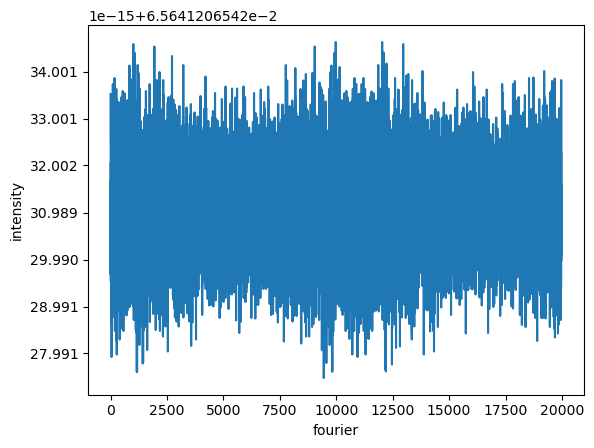

In [170]:
# plots the initial wave prior transforms
plt.plot(frequencies_transformed)
plt.xlabel("fourier")
plt.ylabel("intensity")
plt.show()

In [132]:
# scipy fft
from scipy.fft import fft, fftfreq

ValueError: x and y must have same first dimension, but have shapes (485100,) and (351517,)

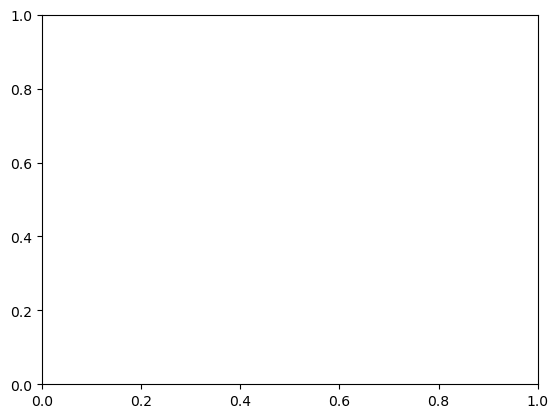

In [146]:
# Number of samples in normalized_tone
N = rate * duration

yf = fft(nonzerodata)
xf = fftfreq(N, 1 / rate)

plt.plot(xf, np.abs(yf))
plt.show()